## Pertanyaan:
Manakah Campaign Ads yang lebih baik antara Facebook Ads dan AdWords Ads (Google Ads)?

## Hipotesis:
Facebook Ads lebih unggul daripada AdWords Ads karena mampu menjangkau audiens yang lebih luas dan relevan melalui fitur penargetan berbasis minat serta aktivitas pengguna.

In [2]:
#import library pandas
import pandas as pd
#import dataset dari file csv
df = pd.read_csv('Capstone Dataset.xlsx - Capstone Dataset.csv')

#menampilkan informasi dari dataset 
df.info()
#menampilkan 5 data paling atas dari dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2023,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30
1,1/2/2023,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2023,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2023,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2023,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40


In [3]:
#merubah format kolom 'Date' dari objet/string ke datetime
df['Date'] = pd.to_datetime(df['Date'])
#merubah format string ke float pada kolom yang berisikan angka pada campaign Facebook Ads
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].replace('[\\$,]','',regex=True).astype(int)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].replace('%','',regex=True).astype(float)/100
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].replace('%','',regex=True).astype(float)/100
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].replace('[\\$,]','',regex=True).astype(float)

#merubah format string ke float pada kolom yang berisikan angka pada campaign Facebook Ads
df['Cost per AdWords Ad'] = df['Cost per AdWords Ad'].replace('[\\$,]','',regex=True).astype(int)
df['AdWords Click-Through Rate (Clicks / View)'] = df['AdWords Click-Through Rate (Clicks / View)'].replace('%','',regex=True).astype(float)/100
df['AdWords Conversion Rate (Conversions / Click)'] = df['AdWords Conversion Rate (Conversions / Click)'].replace('%','',regex=True).astype(float)/100
df['AdWords Cost per Click (Ad Cost / Clicks)'] = df['AdWords Cost per Click (Ad Cost / Clicks)'].replace('[\\$,]','',regex=True).astype(float)

#cek kembali informasi dataset apakah sudah berubah atau belum
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             365 non-null    datetime64[ns]
 1   Facebook Ad Campaign                             365 non-null    object        
 2   Facebook Ad Views                                365 non-null    int64         
 3   Facebook Ad Clicks                               365 non-null    int64         
 4   Facebook Ad Conversions                          365 non-null    int64         
 5   Cost per Facebook Ad                             365 non-null    int64         
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    float64       
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    float64       
 8   Facebook Cost per Click (Ad Cost / Click

In [4]:
#menemukan rentang waktu dari dataset
tanggal_awal = df['Date'].min()
tanggal_akhir = df['Date'].max()
print (tanggal_akhir - tanggal_awal)


364 days 00:00:00


In [5]:
#cek apakah ada duplikat
cek_duplikat = df.duplicated()
df[cek_duplikat]

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)


In [6]:
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2023-01-01,FB_Jan,2116,18,8,126,0.0083,0.4273,7.14,AW_Jan,4984,59,5,234,0.0118,0.0840,3.30
1,2023-01-02,FB_Jan,3106,36,12,104,0.0115,0.3404,2.91,AW_Jan,4022,71,6,75,0.0177,0.0780,1.05
2,2023-01-03,FB_Jan,3105,26,8,102,0.0084,0.3145,3.89,AW_Jan,3863,44,4,141,0.0113,0.0959,3.23
3,2023-01-04,FB_Jan,1107,27,9,71,0.0245,0.3476,2.62,AW_Jan,3911,49,5,141,0.0126,0.1108,2.86
4,2023-01-05,FB_Jan,1317,15,7,78,0.0110,0.4759,5.38,AW_Jan,4070,55,7,133,0.0136,0.1222,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,FB_Dec,3240,51,13,63,0.0157,0.2589,1.24,AW_Dec,5332,72,9,76,0.0135,0.1192,1.06
361,2023-12-28,FB_Dec,1510,69,18,97,0.0455,0.2582,1.42,AW_Dec,3887,49,6,121,0.0127,0.1310,2.46
362,2023-12-29,FB_Dec,2918,44,13,49,0.0150,0.2911,1.11,AW_Dec,5327,62,6,128,0.0116,0.0985,2.08
363,2023-12-30,FB_Dec,2212,37,8,102,0.0168,0.2270,2.75,AW_Dec,4020,71,6,119,0.0176,0.0783,1.68


<Axes: xlabel='Date'>

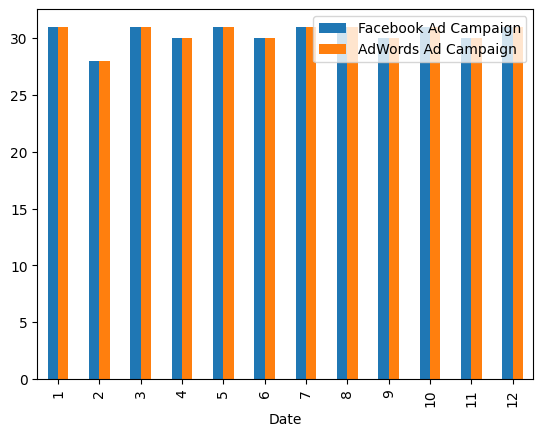

In [113]:

#melihat jumlah ads setiap bulannya dari masing-masing campaign
df_jumlah = df.groupby(df['Date'].dt.month)[['Facebook Ad Campaign','AdWords Ad Campaign']].count()
df_jumlah.plot(kind='bar')


<Axes: >

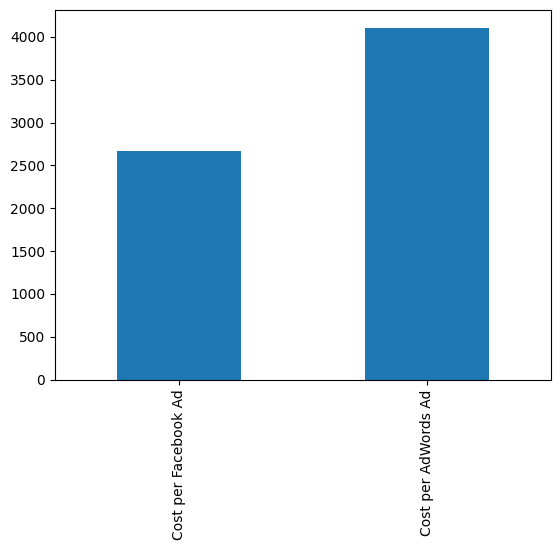

In [120]:
#membuat var baru yang berisis kolom dengan tipedata angka yang digrup berdasarkan bulan
df_sum = df.groupby(df['Date'].dt.month).sum(numeric_only=True)
#menghitung rata-rata jumlah biaya ads untuk masing masing campaign perbulan
df_sum[['Cost per Facebook Ad','Cost per AdWords Ad']].mean().plot(kind='bar')

<Axes: >

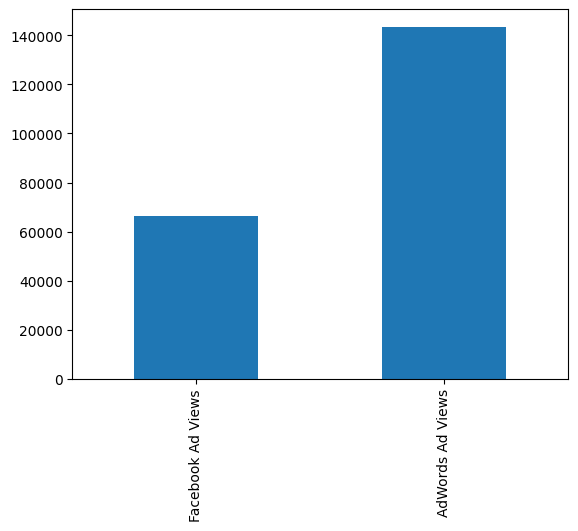

In [119]:
#menghitung rata-rata jumlah views ads untuk masing masing campaign perbulan
df_sum[['Facebook Ad Views','AdWords Ad Views']].mean().plot(kind='bar')

<Axes: >

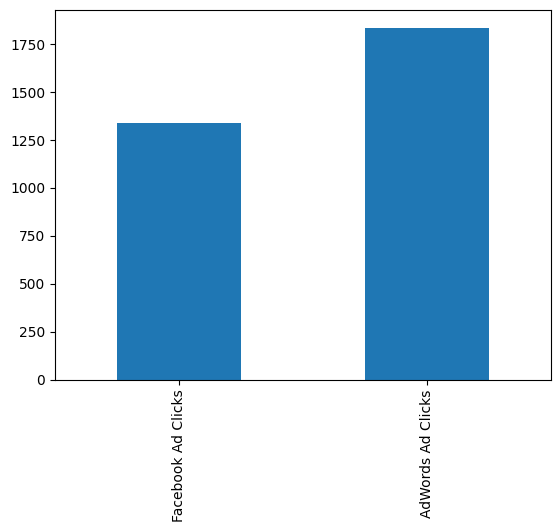

In [118]:
#menghitung jumlah clicks ads untuk masing masing campaign perbulan
df_sum[['Facebook Ad Clicks','AdWords Ad Clicks']].mean().plot(kind='bar')

<Axes: >

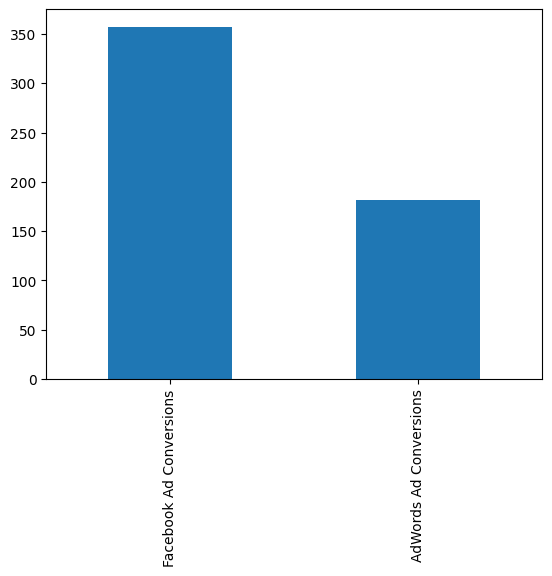

In [117]:
#menghitung jumlah conversion ads untuk masing masing campaign perbulan
df_sum[['Facebook Ad Conversions','AdWords Ad Conversions']].mean().plot(kind='bar')

<Axes: >

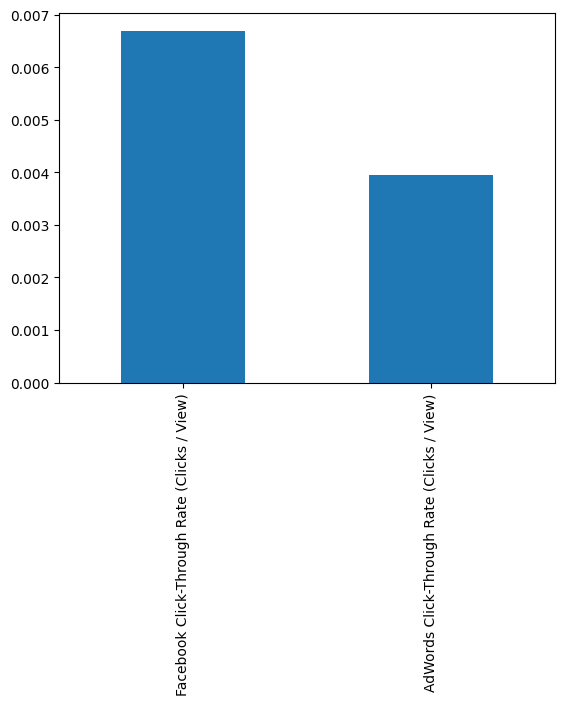

In [121]:
#menghitung jumlah ctr ads untuk masing masing campaign perbulan
df_sum[['Facebook Click-Through Rate (Clicks / View)','AdWords Click-Through Rate (Clicks / View)']].mean().plot(kind='bar')

<Axes: >

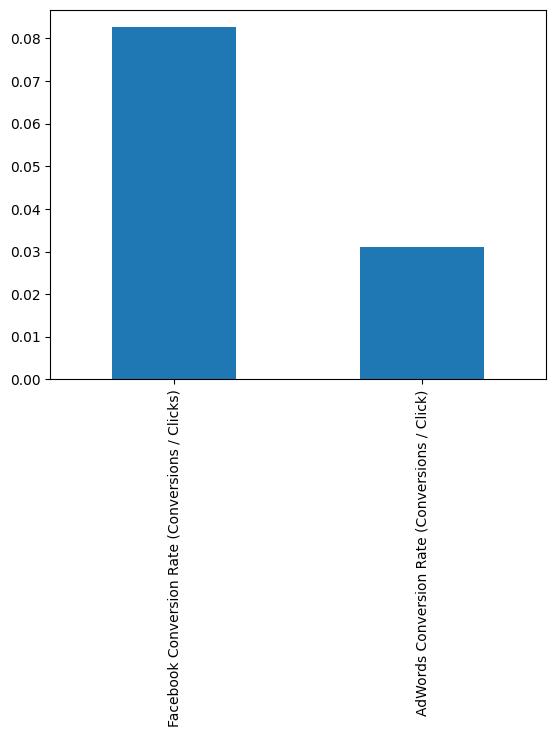

In [122]:
#menghitung conversion rate dari masing-masing campaign perbulan
df_sum[['Facebook Conversion Rate (Conversions / Clicks)','AdWords Conversion Rate (Conversions / Click)']].mean().plot(kind='bar')

In [123]:
df_sum

,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
Date,,,,,,,,,,,,,,
1,67666,1194,334,2594,0.005905,0.090285,77.52,141493,1844,179,4324,0.004120,0.030929,77.04
2,63726,1068,298,2497,0.005302,0.079967,71.05,131178,1686,170,3667,0.003598,0.028749,65.53
3,62847,1266,347,2903,0.006876,0.085740,78.25,144737,1790,178,4063,0.003880,0.031939,76.54
4,64424,1229,334,2614,0.006472,0.082870,69.30,139300,1833,189,4354,0.003974,0.031612,75.34
5,69611,1260,341,2435,0.006074,0.084620,66.88,148489,1834,179,4018,0.003887,0.031626,72.23
6,60150,1259,343,2581,0.006572,0.082269,66.05,142444,1892,187,4324,0.004018,0.030194,71.61
7,64356,1431,375,2692,0.007612,0.082389,62.44,145078,1968,196,4224,0.004218,0.031260,70.85
8,70914,1302,349,2493,0.006399,0.084765,63.99,148753,1825,183,4303,0.003867,0.032396,78.01
9,68865,1412,377,2682,0.006612,0.080626,62.11,139375,1895,187,4164,0.004145,0.030593,69.31


In [124]:
#karena kolom CPC tidak sesuai maka aku membuat kolom CPC baru untuk Facebook dan AdWords

#drop kolom cpc sebelumnya
df_sum = df_sum.drop(columns=['Facebook Cost per Click (Ad Cost / Clicks)','AdWords Cost per Click (Ad Cost / Clicks)'])
#membuat kolom cpc baru
df_sum['Facebook CPC'] = df_sum['Cost per Facebook Ad'] / df_sum['Facebook Ad Clicks']
df_sum['AdWords CPC'] = df_sum['Cost per AdWords Ad'] / df_sum['AdWords Ad Clicks']
#menampilkan hasil
df_sum



,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),Facebook CPC,AdWords CPC
Date,,,,,,,,,,,,,,
1,67666,1194,334,2594,0.005905,0.090285,141493,1844,179,4324,0.004120,0.030929,2.172529,2.344902
2,63726,1068,298,2497,0.005302,0.079967,131178,1686,170,3667,0.003598,0.028749,2.338015,2.174970
3,62847,1266,347,2903,0.006876,0.085740,144737,1790,178,4063,0.003880,0.031939,2.293049,2.269832
4,64424,1229,334,2614,0.006472,0.082870,139300,1833,189,4354,0.003974,0.031612,2.126932,2.375341
5,69611,1260,341,2435,0.006074,0.084620,148489,1834,179,4018,0.003887,0.031626,1.932540,2.190840
6,60150,1259,343,2581,0.006572,0.082269,142444,1892,187,4324,0.004018,0.030194,2.050040,2.285412
7,64356,1431,375,2692,0.007612,0.082389,145078,1968,196,4224,0.004218,0.031260,1.881202,2.146341
8,70914,1302,349,2493,0.006399,0.084765,148753,1825,183,4303,0.003867,0.032396,1.914747,2.357808
9,68865,1412,377,2682,0.006612,0.080626,139375,1895,187,4164,0.004145,0.030593,1.899433,2.197361


<Axes: >

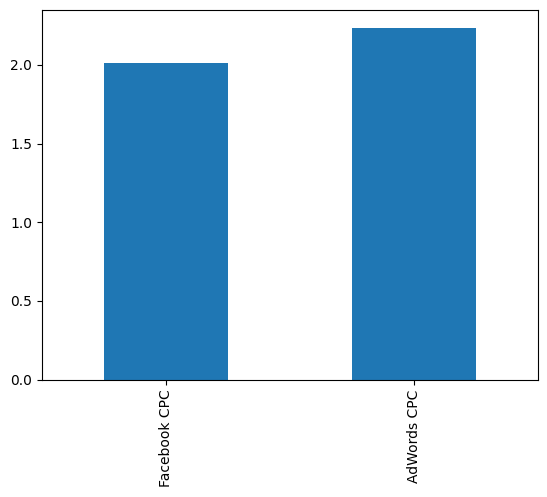

In [125]:
#membandingkan CPC facebook dengn AdWords 
df_sum[['Facebook CPC', 'AdWords CPC']].mean().plot(kind='bar')

## Kesimpulan

1. Facebook Ads memberikan dampak yang lebih besar terhadap bisnis dibandingkan AdWords Ads. Dengan biaya yang lebih rendah, Facebook mampu menghasilkan conversion rate yang lebih tinggi dibandingkan AdWords.

2. AdWords unggul dalam jumlah views dan clicks, menunjukkan jangkauan yang lebih luas. Namun, performanya menurun drastis pada conversion rate, menandakan bahwa banyak pengguna yang melihat dan mengklik iklan tetapi tidak melakukan konversi.
3. Facebook Ads unggul di hampir semua aspek performa iklan, kecuali pada jumlah views dan clicks, yang berarti lebih efektif dalam menarik dan mengonversi audiens yang lebih relevan.

## Insight & Rekomendasi

1. Optimalkan alokasi anggaran ke Facebook Ads, karena memiliki conversion rate tinggi.

2. Analisis ulang strategi AdWords Ads, fokus pada peningkatan kualitas keyword dan target audiens agar conversion rate meningkat.

In [1]:
df_sum.to_csv('Facebook Ads & AdWords Ads.csv', index=False)

NameError: name 'df_sum' is not defined

In [7]:
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2023-01-01,FB_Jan,2116,18,8,126,0.0083,0.4273,7.14,AW_Jan,4984,59,5,234,0.0118,0.0840,3.30
1,2023-01-02,FB_Jan,3106,36,12,104,0.0115,0.3404,2.91,AW_Jan,4022,71,6,75,0.0177,0.0780,1.05
2,2023-01-03,FB_Jan,3105,26,8,102,0.0084,0.3145,3.89,AW_Jan,3863,44,4,141,0.0113,0.0959,3.23
3,2023-01-04,FB_Jan,1107,27,9,71,0.0245,0.3476,2.62,AW_Jan,3911,49,5,141,0.0126,0.1108,2.86
4,2023-01-05,FB_Jan,1317,15,7,78,0.0110,0.4759,5.38,AW_Jan,4070,55,7,133,0.0136,0.1222,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,FB_Dec,3240,51,13,63,0.0157,0.2589,1.24,AW_Dec,5332,72,9,76,0.0135,0.1192,1.06
361,2023-12-28,FB_Dec,1510,69,18,97,0.0455,0.2582,1.42,AW_Dec,3887,49,6,121,0.0127,0.1310,2.46
362,2023-12-29,FB_Dec,2918,44,13,49,0.0150,0.2911,1.11,AW_Dec,5327,62,6,128,0.0116,0.0985,2.08
363,2023-12-30,FB_Dec,2212,37,8,102,0.0168,0.2270,2.75,AW_Dec,4020,71,6,119,0.0176,0.0783,1.68


In [8]:
df_new = df.drop(columns=['Facebook Cost per Click (Ad Cost / Clicks)','AdWords Cost per Click (Ad Cost / Clicks)'])
#membuat kolom cpc baru
df_new['Facebook CPC'] = df_new['Cost per Facebook Ad'] / df_new['Facebook Ad Clicks']
df_new['AdWords CPC'] = df_new['Cost per AdWords Ad'] / df_new['AdWords Ad Clicks']
#menampilkan hasil
df_new


,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),Facebook CPC,AdWords CPC
0,2023-01-01,FB_Jan,2116,18,8,126,0.0083,0.4273,AW_Jan,4984,59,5,234,0.0118,0.0840,7.000000,3.966102
1,2023-01-02,FB_Jan,3106,36,12,104,0.0115,0.3404,AW_Jan,4022,71,6,75,0.0177,0.0780,2.888889,1.056338
2,2023-01-03,FB_Jan,3105,26,8,102,0.0084,0.3145,AW_Jan,3863,44,4,141,0.0113,0.0959,3.923077,3.204545
3,2023-01-04,FB_Jan,1107,27,9,71,0.0245,0.3476,AW_Jan,3911,49,5,141,0.0126,0.1108,2.629630,2.877551
4,2023-01-05,FB_Jan,1317,15,7,78,0.0110,0.4759,AW_Jan,4070,55,7,133,0.0136,0.1222,5.200000,2.418182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,FB_Dec,3240,51,13,63,0.0157,0.2589,AW_Dec,5332,72,9,76,0.0135,0.1192,1.235294,1.055556
361,2023-12-28,FB_Dec,1510,69,18,97,0.0455,0.2582,AW_Dec,3887,49,6,121,0.0127,0.1310,1.405797,2.469388
362,2023-12-29,FB_Dec,2918,44,13,49,0.0150,0.2911,AW_Dec,5327,62,6,128,0.0116,0.0985,1.113636,2.064516
363,2023-12-30,FB_Dec,2212,37,8,102,0.0168,0.2270,AW_Dec,4020,71,6,119,0.0176,0.0783,2.756757,1.676056


In [9]:
df_new.to_csv('Facebook Ads & AdWords Ads.csv', index=False)